In [ ]:
import pandas as pd
data=pd.read_csv('/content/crime_dataset_india.csv')
data.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Report Number       40160 non-null  int64 
 1   Date Reported       40160 non-null  object
 2   Date of Occurrence  40160 non-null  object
 3   Time of Occurrence  40160 non-null  object
 4   City                40160 non-null  object
 5   Crime Code          40160 non-null  int64 
 6   Crime Description   40160 non-null  object
 7   Victim Age          40160 non-null  int64 
 8   Victim Gender       40160 non-null  object
 9   Weapon Used         34370 non-null  object
 10  Crime Domain        40160 non-null  object
 11  Police Deployed     40160 non-null  int64 
 12  Case Closed         40160 non-null  object
 13  Date Case Closed    20062 non-null  object
dtypes: int64(4), object(10)
memory usage: 4.3+ MB


In [ ]:
data.isna().any()

,0
Report Number,False
Date Reported,False
Date of Occurrence,False
Time of Occurrence,False
City,False
Crime Code,False
Crime Description,False
Victim Age,False
Victim Gender,False
Weapon Used,True


In [ ]:
data['Weapon Used'].unique()

array(['Blunt Object', 'Poison', 'Firearm', 'Other', 'Knife',
       'Explosives', nan], dtype=object)

In [ ]:
data['Weapon Used'].value_counts()

,count
Weapon Used,
Knife,5835
Explosives,5751
Blunt Object,5737
Poison,5728
Other,5676
Firearm,5643


In [ ]:
data['Weapon Used'] = data['Weapon Used'].fillna('Unknown')


In [ ]:
data['Weapon Used'].value_counts()

,count
Weapon Used,
Knife,5835
Unknown,5790
Explosives,5751
Blunt Object,5737
Poison,5728
Other,5676
Firearm,5643


In [ ]:
data['Date Case Closed'] = data['Date Case Closed'].fillna('Not Closed')


In [ ]:
data.isna().any()

,0
Report Number,False
Date Reported,False
Date of Occurrence,False
Time of Occurrence,False
City,False
Crime Code,False
Crime Description,False
Victim Age,False
Victim Gender,False
Weapon Used,False


In [ ]:
data['Date of Occurrence'] = pd.to_datetime(data['Date of Occurrence'], dayfirst=True, errors='coerce')
data['Time of Occurrence'] = pd.to_datetime(data['Time of Occurrence'], dayfirst=True, errors='coerce')
data['Date Case Closed'] = pd.to_datetime(data['Date Case Closed'], errors='coerce')


data['Year'] = data['Date of Occurrence'].dt.year
data['Month'] = data['Date of Occurrence'].dt.month
data['Hour'] = data['Time of Occurrence'].dt.hour


<ipython-input-11-d688385c88c7>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date Case Closed'] = pd.to_datetime(data['Date Case Closed'], errors='coerce')


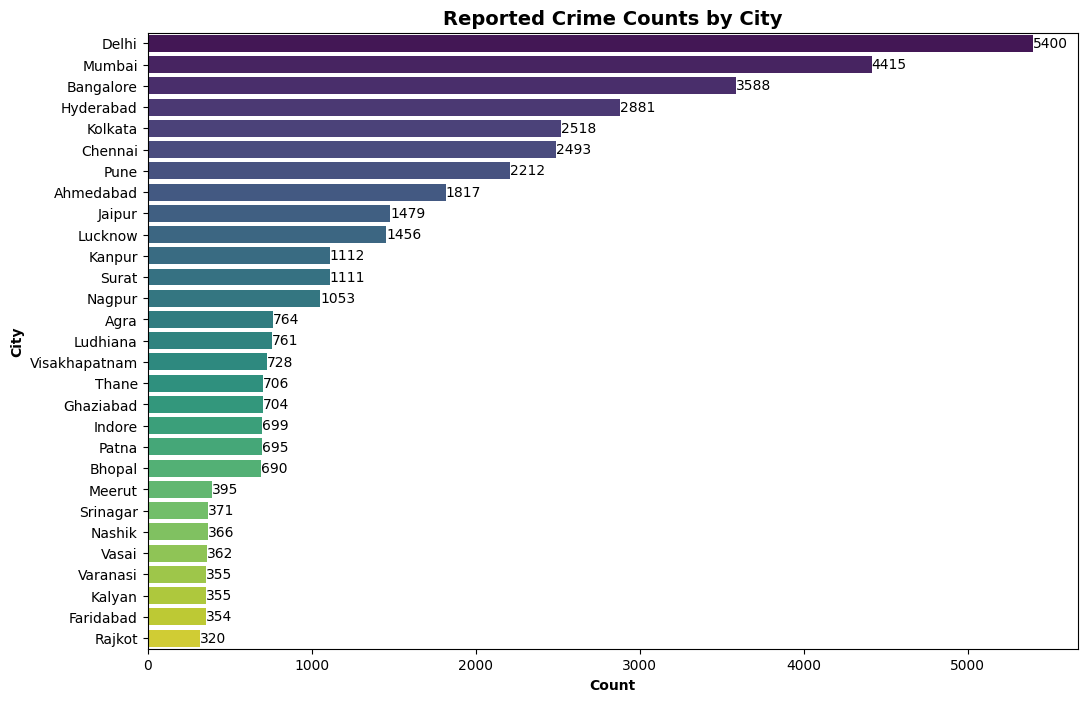

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

city_counts = data['City'].value_counts().reset_index()
city_counts.columns = ['City', 'Count']

plt.figure(figsize=(12,8))

ax = sns.barplot(data=city_counts, y='City', x='Count', hue='City', palette='viridis')
plt.title('Reported Crime Counts by City', fontsize=14, fontweight='bold')
plt.xlabel('Count', fontweight='bold')
plt.ylabel('City', fontweight='bold')

for index, row in city_counts.iterrows():
    ax.text(row['Count'], index, f'{row["Count"]}', color='black', va='center')

plt.show()


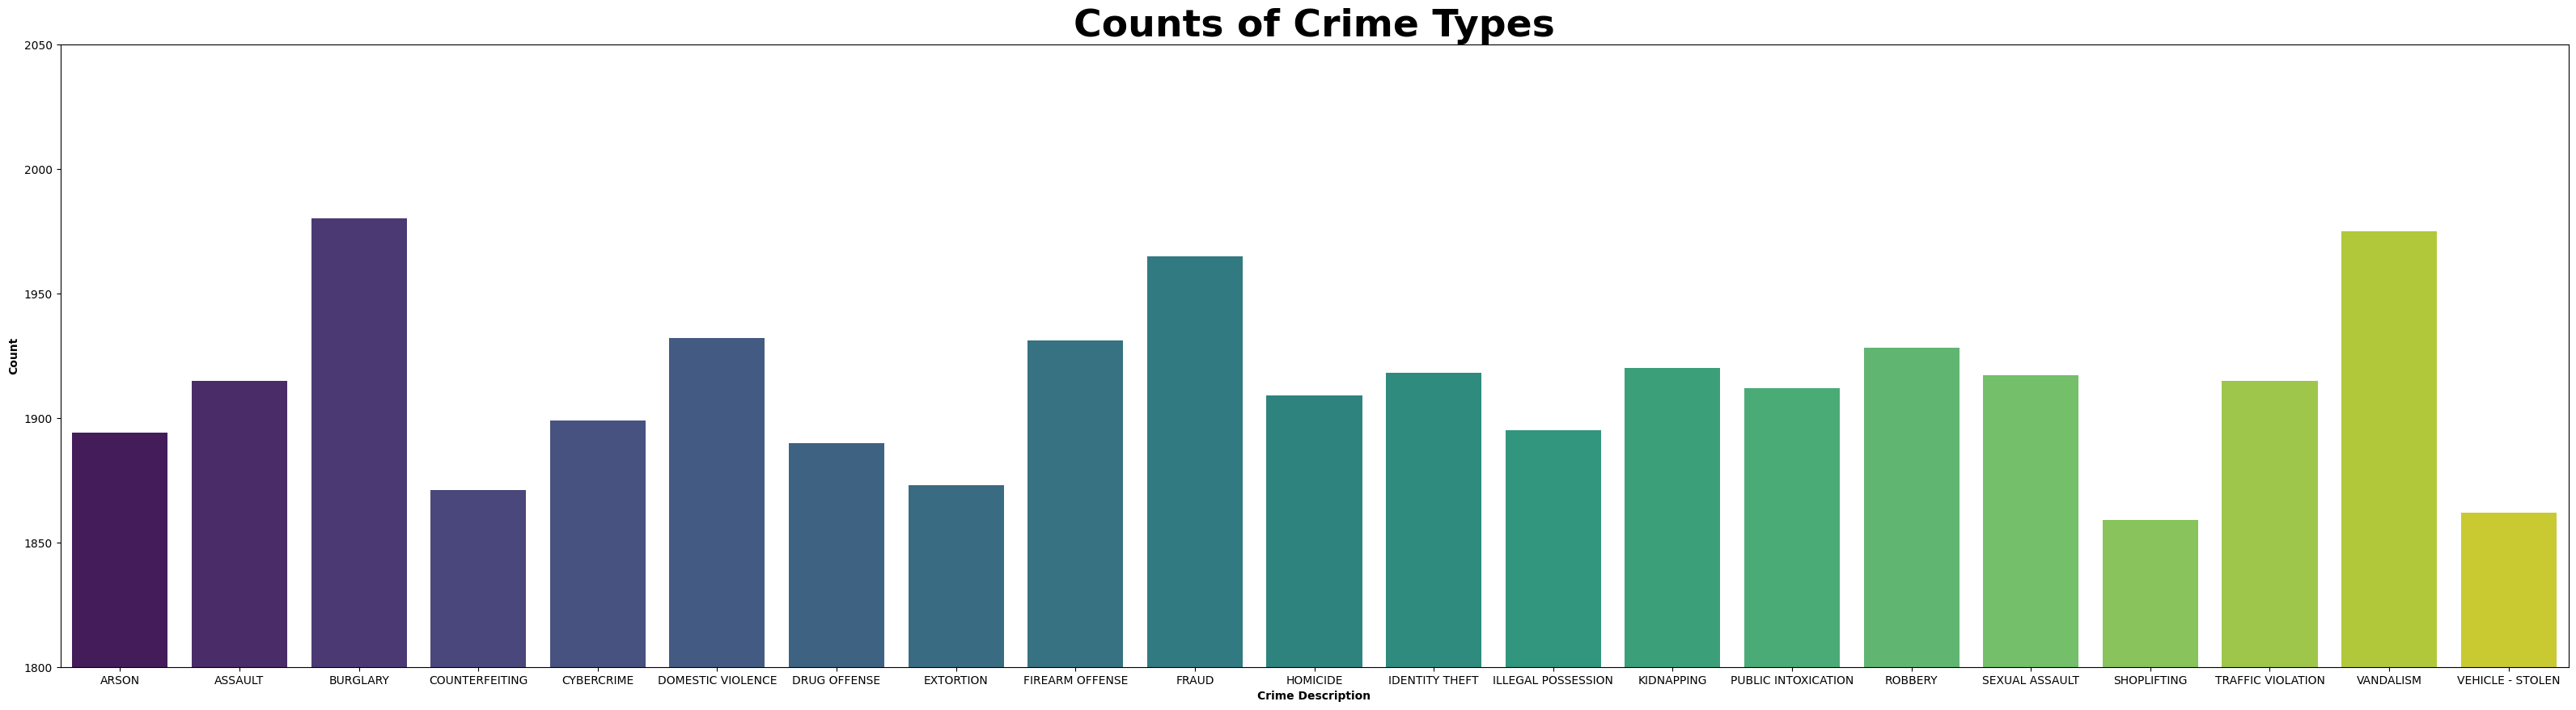

In [ ]:
crime_type = data['Crime Description'].value_counts().reset_index()
crime_type.columns = ['Crime Description', 'Count']
crime_type = crime_type.sort_values(by='Crime Description')

plt.figure(figsize=(40,10))
sns.barplot(data=crime_type, x='Crime Description', y='Count',hue='Crime Description', palette='viridis')
plt.title("Counts of Crime Types", fontsize=34, fontweight='bold')
plt.xlabel('Crime Description', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.ylim(1800, 2050)
plt.show()


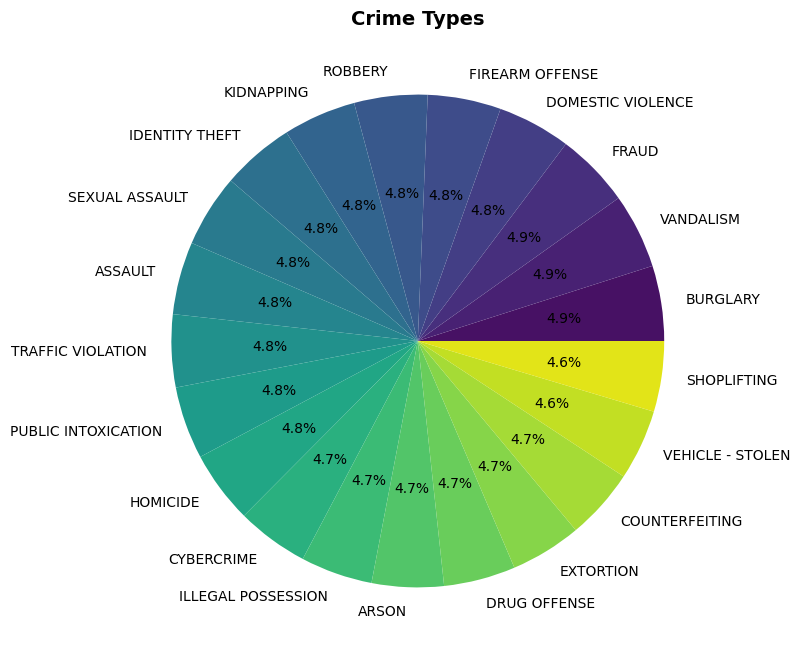

In [ ]:
crime_type_counts = data['Crime Description'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(crime_type_counts, labels=crime_type_counts.index,autopct='%1.1f%%', colors=sns.color_palette('viridis', len(crime_type_counts)))
plt.title("Crime Types", fontsize=14, fontweight='bold')
plt.show()

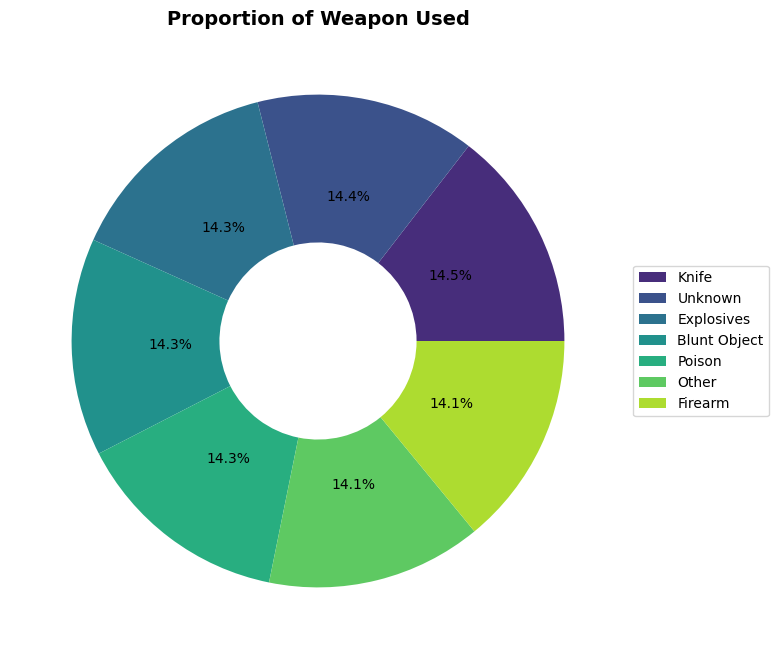

In [ ]:
Weapon_used_counts = data['Weapon Used'].value_counts()
colors = sns.color_palette('viridis', len(Weapon_used_counts))

plt.figure(figsize=(8, 8))
plt.pie( Weapon_used_counts,autopct='%1.1f%%',colors=colors,wedgeprops=dict(width=0.6))
plt.title("Proportion of Weapon Used", fontsize=14, fontweight='bold')

plt.legend(labels=Weapon_used_counts.index,loc='center left',bbox_to_anchor=(1, 0.5))
plt.show()


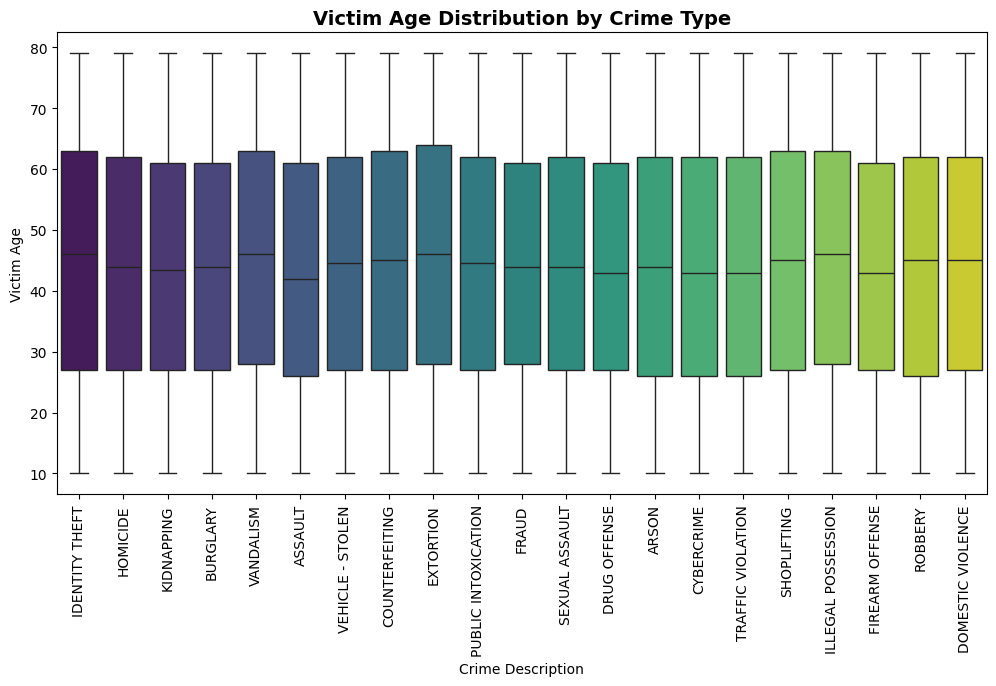

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data, x='Crime Description', y='Victim Age', hue='Crime Description', palette='viridis')
plt.xticks(rotation=90)
plt.title("Victim Age Distribution by Crime Type", fontsize=14, fontweight='bold')

plt.xlabel('Crime Description')
plt.ylabel('Victim Age')
plt.show()

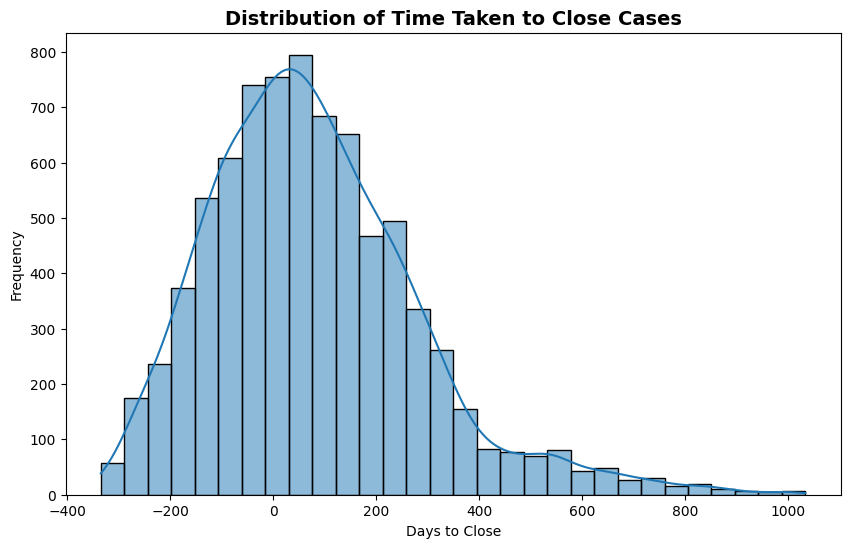

In [ ]:
data['Date Case Closed'] = pd.to_datetime(data['Date Case Closed'], errors='coerce')
data['Days to Close'] = (data['Date Case Closed'] - data['Date of Occurrence']).dt.days
plt.figure(figsize=(10, 6))

sns.histplot(data['Days to Close'].dropna(), bins=30, kde=True)
plt.title("Distribution of Time Taken to Close Cases", fontsize=14, fontweight='bold')
plt.xlabel('Days to Close')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import plotly.express as px
plt.figure(figsize=(12, 6))

data['Hour of Occurrence'] = pd.to_datetime(data['Time of Occurrence'], errors='coerce').dt.hour

crime_by_hour = data['Hour of Occurrence'].value_counts().sort_index().reset_index(name='Crime Count') # Replace crime_df with data
crime_by_hour.columns = ['Hour of Occurrence', 'Crime Count']

fig = px.line(crime_by_hour, x='Hour of Occurrence', y='Crime Count',
              title='Crime Occurrence by Time of Day')
fig.update_layout(title_font=dict(size=18, family='Arial Black'))
fig.show()

<Figure size 1200x600 with 0 Axes>

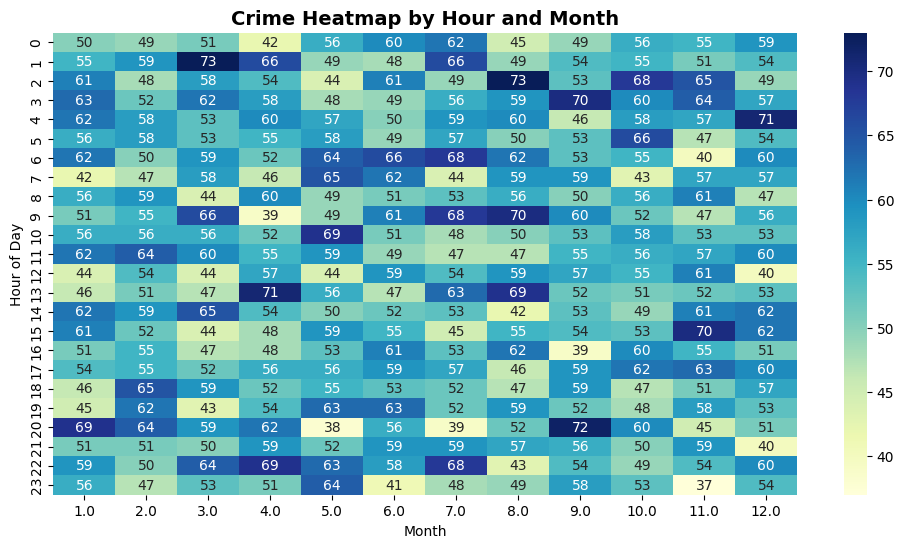

In [ ]:
plt.figure(figsize=(12, 6))

hourly_crime_counts = data.groupby(['Hour', 'Month']).size().unstack()
sns.heatmap(hourly_crime_counts, cmap='YlGnBu', annot=True, fmt='d')
plt.title("Crime Heatmap by Hour and Month", fontsize=14, fontweight='bold')

plt.xlabel('Month')
plt.ylabel('Hour of Day')
plt.show()